In [1]:
print("Jai Mahakaal 🕉️")

Jai Mahakaal 🕉️


In [2]:
print("36 biradari bhaichara jindabad 💪")

36 biradari bhaichara jindabad 💪


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin,accuracy_score,silhouette_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

# 1. Perform K-means with Scratch and with the library and plot the graphs and print the Initial and Final Centroids. Use random generated datapoints and make_blobs dataset of sklearn.

In [5]:
x,y=datasets.make_blobs(n_samples=500, centers=None, n_features=2,random_state=0)


In [6]:
df=pd.DataFrame(x,columns=["Feature1","Feature2"])
data=df.copy()
data["Target"]=y
data.head()

,Feature1,Feature2,Target
0,1.103182,4.705777,0
1,-1.932846,3.642251,2
2,-2.034422,1.866002,2
3,1.616402,2.686831,0
4,-0.960010,4.492566,0


C:\Users\visha\AppData\Local\Temp\ipykernel_1544\4022724903.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],cmap='viridis', s=50)


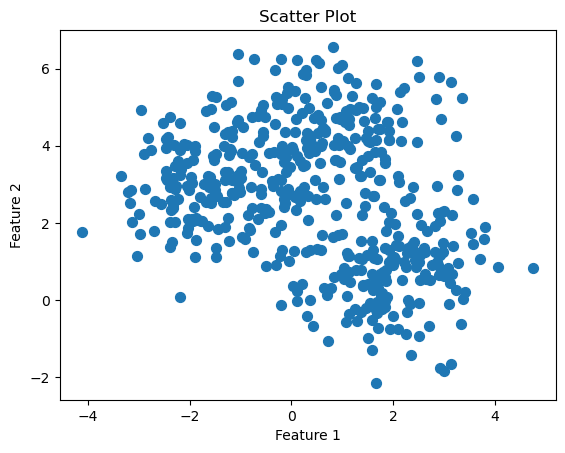

In [8]:
plt.title("Scatter Plot")
plt.scatter(x[:,0],x[:,1],cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Initial Cluster : 
 [[-0.80380352  2.94249439]
 [-2.45969305  4.16120165]
 [ 2.84382904  5.20983199]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


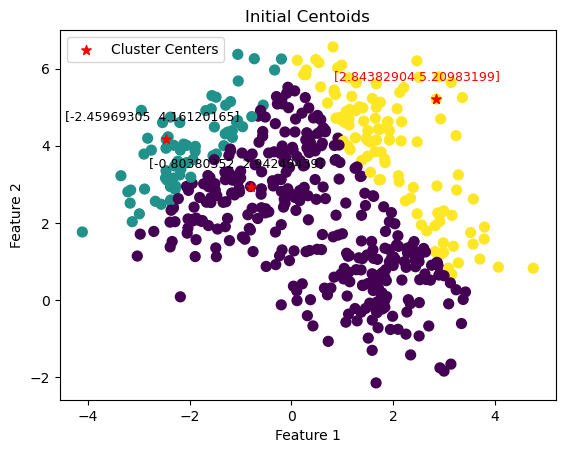

updated center : 1 [[ 0.4069391   2.01473225]
 [-2.01222484  3.97490845]
 [ 1.99240945  3.93243527]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


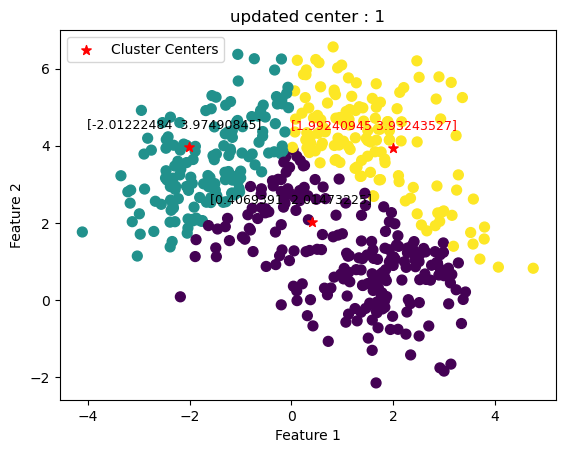

updated center : 2 [[ 1.13490183  1.12164322]
 [-1.61262914  3.53677462]
 [ 1.54776198  4.11661189]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


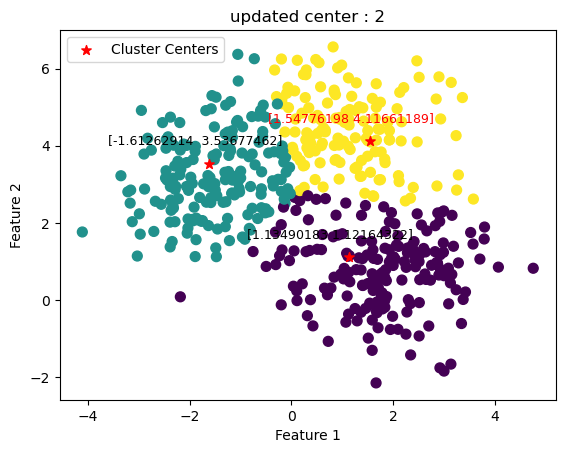

updated center : 3 [[ 1.75520173  0.7882726 ]
 [-1.50911484  3.19831645]
 [ 1.13122764  4.40260245]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


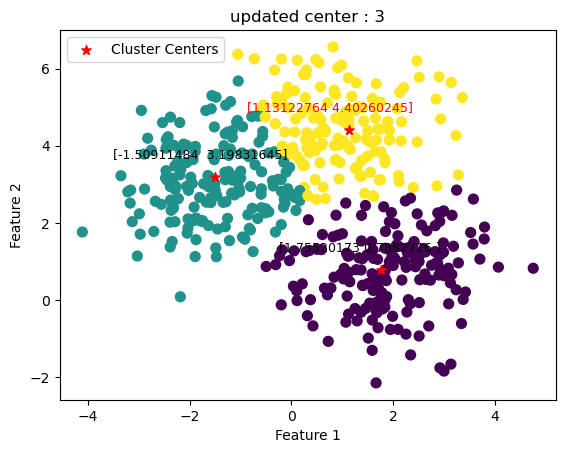

updated center : 4 [[ 1.90259787  0.74913075]
 [-1.49984755  3.03888503]
 [ 0.98153364  4.46425857]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


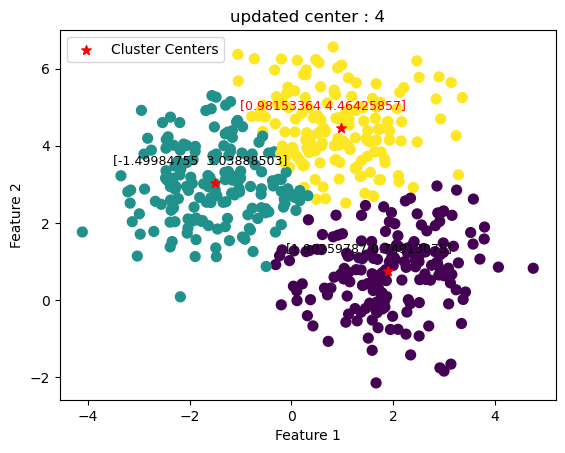

updated center : 5 [[ 1.92696394  0.75099557]
 [-1.52472084  2.97061358]
 [ 0.90907574  4.4670649 ]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


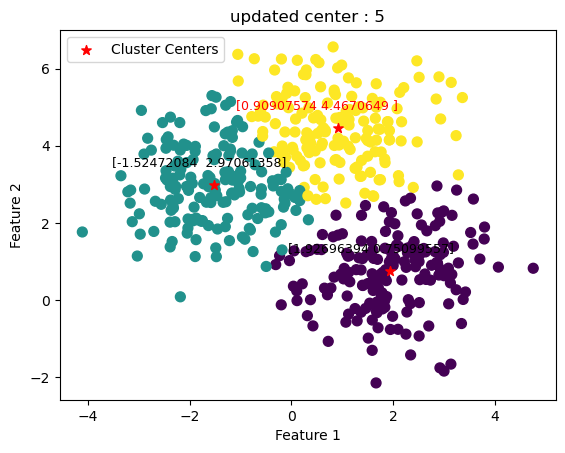

updated center : 6 [[ 1.94876166  0.73995113]
 [-1.5294146   2.9443254 ]
 [ 0.88851433  4.45086408]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


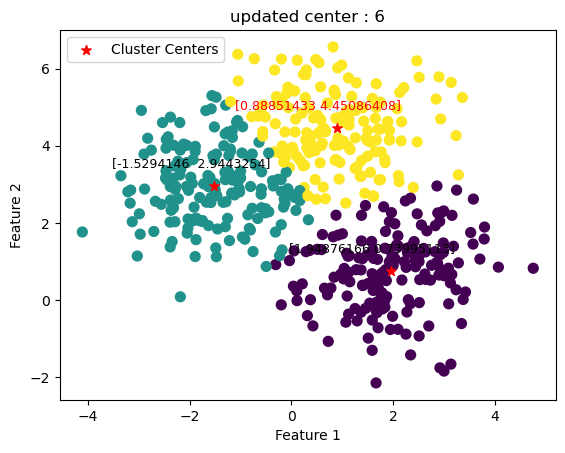

updated center : 7 [[ 1.96167358  0.73752985]
 [-1.52371332  2.92068825]
 [ 0.87564159  4.45514163]]


C:\Users\visha\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


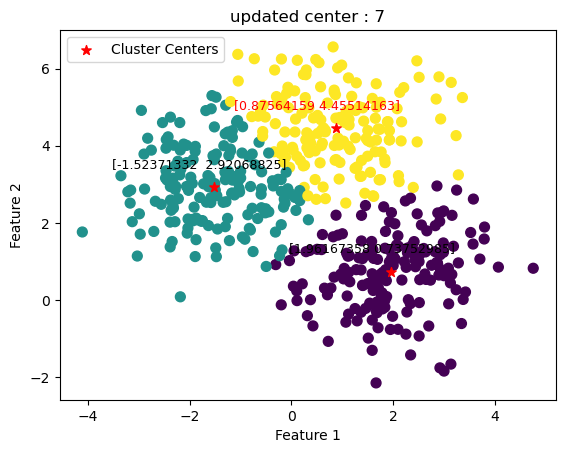

updated center : 8 [[ 1.96167358  0.73752985]
 [-1.52371332  2.92068825]
 [ 0.87564159  4.45514163]]


,Feature1,Feature2,labels1,labels2,labels3,labels4,labels5,labels6,labels7
0,1.103182,4.705777,2,2,2,2,2,2,2
1,-1.932846,3.642251,1,1,1,1,1,1,1
2,-2.034422,1.866002,1,1,1,1,1,1,1
3,1.616402,2.686831,2,2,2,2,2,2,2
4,-0.960010,4.492566,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
495,2.660388,1.793220,2,0,0,0,0,0,0
496,2.875589,2.257612,2,0,0,0,0,0,0
497,2.826673,1.927102,2,0,0,0,0,0,0
498,-0.094483,5.358239,1,2,2,2,2,2,2


In [15]:
n_cluster=3
def kmeans(n_cluster,x,y,df):
    df1=df.copy()
    rng=np.random.RandomState(6)
    i=rng.permutation(x.shape[0])[:n_cluster]
    centroid=x[i]
    labels=pairwise_distances_argmin(x,centroid)
    print("Initial Cluster : \n",centroid)
    plt.title("Initial Centoids")
    plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis', s=50)
    plt.scatter(centroid[:,0], centroid[:,1], s=50, marker="*", c="red", label='Cluster Centers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.text(centroid[0][0]-2,centroid[0][1]+0.5, centroid[0], fontsize=9, color='black')
    plt.text(centroid[1][0]-2,centroid[1][1]+0.5, centroid[1], fontsize=9, color='black')
    plt.text(centroid[2][0]-2,centroid[2][1]+0.5, centroid[2], fontsize=9, color='red')
    plt.show()
    j=1
    while True:
        new_center=np.array([x[labels==i].mean(0) for i in range(n_cluster)])
        print("updated center : "+str(j),new_center)
        if np.all(centroid==new_center):
            break
        centroid=new_center
        labels=pairwise_distances_argmin(x,centroid)
        df1["labels"+str(j)]=labels
        plt.title("updated center : "+str(j))
        plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis', s=50)
        plt.scatter(centroid[:,0], centroid[:,1], s=50, marker="*", c="red", label='Cluster Centers')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.text(centroid[0][0]-2,centroid[0][1]+0.5, centroid[0], fontsize=9, color='black')
        plt.text(centroid[1][0]-2,centroid[1][1]+0.5, centroid[1], fontsize=9, color='black')
        plt.text(centroid[2][0]-2,centroid[2][1]+0.5, centroid[2], fontsize=9, color='red')
        plt.show()
        j=j+1
    return df1 


kmeans(3,x,y,df)

In [29]:
k=KMeans(n_clusters=3,random_state=42)
k.fit(df)
#pt=np.array([-2.901306,7.550771]).reshape(1,-1)
y_pred=k.predict(df)
#print(y_pred)
accuracy=silhouette_score(df,y_pred)
print(accuracy)

C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.47229538453502573


In [17]:
#kmeans centroids
kme=k.cluster_centers_
print(kme)

[[ 0.87564159  4.45514163]
 [-1.52371332  2.92068825]
 [ 1.96167358  0.73752985]]


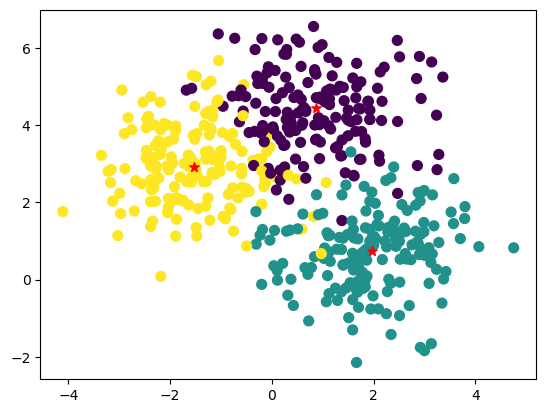

In [21]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis', s=50)
plt.scatter(kme[:,0], kme[:,1], s=50, marker="*", c="red", label='Cluster Centers')

In [22]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2,
       2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0,
       1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0,

In [23]:
y

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,